<a href="https://colab.research.google.com/github/chathuramadusanka/Dialog_model/blob/main/cluster_kaushalya_madam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libries and dataframe

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv('dfjoint_pre.csv')

In [ ]:
data

,Unnamed: 0,MSISDN_ENCR_INT,BI_ACCOUNT_ID_x,ACCOUNT_TYPE,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,...,OVERSEAS_TRAVELLERS,ONLINE_SHOPPER,BANK_USER,ONLINE_PAYER,UPDATE_DATE,DATA_PACKAGE,BI_ACCOUNT_ID_y,VOICE_USAGE,DATA_USAGE,SMS_USAGE
0,0,-6.883145e+17,10933313,PREPAID,163,MALE,29,Tamil,Smartphone,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,Internet_card_119,10933313,0.00000,0.00000,0
1,1,-6.883145e+17,10933313,PREPAID,163,MALE,29,Tamil,Smartphone,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,Internet_card_119,10933313,13.20000,0.00000,0
2,2,-6.883145e+17,10933313,PREPAID,163,MALE,29,Tamil,Smartphone,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,Internet_card_119,10933313,3.66667,0.00000,0
3,3,-6.883145e+17,10933313,PREPAID,163,MALE,29,Tamil,Smartphone,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,Internet_card_119,10933313,13.53333,0.00000,0
4,4,-4.362307e+18,3344913228,PREPAID,0,MALE,37,Sinhala,Smartphone,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,Fun_Blaster_Plus_447,3344913228,0.00000,1921.88583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711166,4711166,-1.784940e+18,1340721483,PREPAID,18,FEMALE,32,Sinhala,Basic,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,ComboPack_EZ_Rs469_Data,1340721483,3.18333,0.00000,0
4711167,4711167,-1.784940e+18,1340721483,PREPAID,18,FEMALE,32,Sinhala,Basic,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,ComboPack_EZ_Rs469_Data,1340721483,33.01667,0.00000,0
4711168,4711168,-1.784940e+18,1340721483,PREPAID,18,FEMALE,32,Sinhala,Basic,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,ComboPack_EZ_Rs469_Data,1340721483,48.53333,0.00228,0
4711169,4711169,-1.784940e+18,1340721483,PREPAID,18,FEMALE,32,Sinhala,Basic,PRP_16,...,0,0,0,0,2023-09-05 16:20:05.066,ComboPack_EZ_Rs469_Data,1340721483,49.88333,0.00000,0


In [ ]:
import seaborn as sns

In [ ]:
data.keys()

Index(['Unnamed: 0', 'MSISDN_ENCR_INT', 'BI_ACCOUNT_ID_x', 'ACCOUNT_TYPE',
       'NETWORK_STAY', 'GENDER', 'AGE', 'PREFERRED_LANGUAGE',
       'DEVICE_CATEGORY', 'SUBSCRIPTION_PLAN', 'VOICE_ARPU', 'DATA_ARPU',
       'PAYMENT_IN_GRACE_PERIOD', 'HOME_LOCATION_DISTRICT',
       'WORK_LOCATION_DISTRICT', 'MULTISIM_STATUS', 'EAT_OUT_SEEKER',
       'OVERSEAS_TRAVELLERS', 'ONLINE_SHOPPER', 'BANK_USER', 'ONLINE_PAYER',
       'UPDATE_DATE', 'DATA_PACKAGE', 'BI_ACCOUNT_ID_y', 'VOICE_USAGE',
       'DATA_USAGE', 'SMS_USAGE'],
      dtype='object')

# Drop unwanted columns

In [ ]:
data = data.drop(['Unnamed: 0', 'BI_ACCOUNT_ID_x', 'EAT_OUT_SEEKER', 'OVERSEAS_TRAVELLERS', 'ONLINE_PAYER', 'ONLINE_SHOPPER', 'BANK_USER', 'BI_ACCOUNT_ID_y','PAYMENT_IN_GRACE_PERIOD', 'ACCOUNT_TYPE', 'UPDATE_DATE'], axis=1)

In [ ]:
data

,MSISDN_ENCR_INT,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,VOICE_ARPU,DATA_ARPU,HOME_LOCATION_DISTRICT,WORK_LOCATION_DISTRICT,MULTISIM_STATUS,DATA_PACKAGE,VOICE_USAGE,DATA_USAGE,SMS_USAGE
0,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,0.00000,0.00000,0
1,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.20000,0.00000,0
2,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,3.66667,0.00000,0
3,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.53333,0.00000,0
4,-4.362307e+18,0,MALE,37,Sinhala,Smartphone,PRP_16,3,308,Matale,MT,0,Fun_Blaster_Plus_447,0.00000,1921.88583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711166,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,3.18333,0.00000,0
4711167,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,33.01667,0.00000,0
4711168,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,48.53333,0.00228,0
4711169,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,49.88333,0.00000,0


# Check nan values in the dataframe and replace it

In [ ]:
nan_check = data.isna().any()

In [ ]:
nan_check

MSISDN_ENCR_INT           False
NETWORK_STAY              False
GENDER                     True
AGE                       False
PREFERRED_LANGUAGE        False
DEVICE_CATEGORY            True
SUBSCRIPTION_PLAN         False
VOICE_ARPU                False
DATA_ARPU                 False
HOME_LOCATION_DISTRICT    False
WORK_LOCATION_DISTRICT     True
MULTISIM_STATUS           False
DATA_PACKAGE              False
VOICE_USAGE               False
DATA_USAGE                False
SMS_USAGE                 False
dtype: bool

In [ ]:
data = data.fillna('unknown')

In [ ]:
data

,MSISDN_ENCR_INT,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,VOICE_ARPU,DATA_ARPU,HOME_LOCATION_DISTRICT,WORK_LOCATION_DISTRICT,MULTISIM_STATUS,DATA_PACKAGE,VOICE_USAGE,DATA_USAGE,SMS_USAGE
0,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,0.00000,0.00000,0
1,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.20000,0.00000,0
2,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,3.66667,0.00000,0
3,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.53333,0.00000,0
4,-4.362307e+18,0,MALE,37,Sinhala,Smartphone,PRP_16,3,308,Matale,MT,0,Fun_Blaster_Plus_447,0.00000,1921.88583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711166,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,3.18333,0.00000,0
4711167,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,33.01667,0.00000,0
4711168,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,48.53333,0.00228,0
4711169,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,49.88333,0.00000,0


In [ ]:
nan_check = data.isna().any()

In [ ]:
nan_check

MSISDN_ENCR_INT           False
NETWORK_STAY              False
GENDER                    False
AGE                       False
PREFERRED_LANGUAGE        False
DEVICE_CATEGORY           False
SUBSCRIPTION_PLAN         False
VOICE_ARPU                False
DATA_ARPU                 False
HOME_LOCATION_DISTRICT    False
WORK_LOCATION_DISTRICT    False
MULTISIM_STATUS           False
DATA_PACKAGE              False
VOICE_USAGE               False
DATA_USAGE                False
SMS_USAGE                 False
dtype: bool

# Check for duplicates

In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,MSISDN_ENCR_INT,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,VOICE_ARPU,DATA_ARPU,HOME_LOCATION_DISTRICT,WORK_LOCATION_DISTRICT,MULTISIM_STATUS,DATA_PACKAGE,VOICE_USAGE,DATA_USAGE,SMS_USAGE
0,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,0.00000,0.00000,0
1,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.20000,0.00000,0
2,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,3.66667,0.00000,0
3,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.53333,0.00000,0
4,-4.362307e+18,0,MALE,37,Sinhala,Smartphone,PRP_16,3,308,Matale,MT,0,Fun_Blaster_Plus_447,0.00000,1921.88583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711076,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,3.18333,0.00000,0
4711077,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,33.01667,0.00000,0
4711078,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,48.53333,0.00228,0
4711079,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,49.88333,0.00000,0


# Group by MSISDN_ENCR_INT

In [ ]:
data

,MSISDN_ENCR_INT,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,VOICE_ARPU,DATA_ARPU,HOME_LOCATION_DISTRICT,WORK_LOCATION_DISTRICT,MULTISIM_STATUS,DATA_PACKAGE,VOICE_USAGE,DATA_USAGE,SMS_USAGE
0,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,0.00000,0.00000,0
1,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.20000,0.00000,0
2,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,3.66667,0.00000,0
3,-6.883145e+17,163,MALE,29,Tamil,Smartphone,PRP_16,0,0,Mullaitivu,MU,1,Internet_card_119,13.53333,0.00000,0
4,-4.362307e+18,0,MALE,37,Sinhala,Smartphone,PRP_16,3,308,Matale,MT,0,Fun_Blaster_Plus_447,0.00000,1921.88583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711076,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,3.18333,0.00000,0
4711077,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,33.01667,0.00000,0
4711078,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,48.53333,0.00228,0
4711079,-1.784940e+18,18,FEMALE,32,Sinhala,Basic,PRP_16,161,0,Nuwara Eliya,NU,1,ComboPack_EZ_Rs469_Data,49.88333,0.00000,0


# Label encode (Transfrom data)

In [ ]:
# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

/var/folders/jf/q_5v011s37j8klhshvkp7vjh0000gq/T/ipykernel_1353/4013656974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
/var/folders/jf/q_5v011s37j8klhshvkp7vjh0000gq/T/ipykernel_1353/4013656974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
/var/folders/jf/q_5v011s37j8klhshvkp7vjh0000gq/T/ipykernel_1353/4013656974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
data

,MSISDN_ENCR_INT,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,VOICE_ARPU,DATA_ARPU,HOME_LOCATION_DISTRICT,WORK_LOCATION_DISTRICT,MULTISIM_STATUS,DATA_PACKAGE,VOICE_USAGE,DATA_USAGE,SMS_USAGE
0,-6.883145e+17,163,1,29,2,3,7,0,0,18,18,1,50,0.00000,0.00000,0
1,-6.883145e+17,163,1,29,2,3,7,0,0,18,18,1,50,13.20000,0.00000,0
2,-6.883145e+17,163,1,29,2,3,7,0,0,18,18,1,50,3.66667,0.00000,0
3,-6.883145e+17,163,1,29,2,3,7,0,0,18,18,1,50,13.53333,0.00000,0
4,-4.362307e+18,0,1,37,1,3,7,3,308,15,17,0,48,0.00000,1921.88583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711076,-1.784940e+18,18,0,32,1,0,7,161,0,19,19,1,4,3.18333,0.00000,0
4711077,-1.784940e+18,18,0,32,1,0,7,161,0,19,19,1,4,33.01667,0.00000,0
4711078,-1.784940e+18,18,0,32,1,0,7,161,0,19,19,1,4,48.53333,0.00228,0
4711079,-1.784940e+18,18,0,32,1,0,7,161,0,19,19,1,4,49.88333,0.00000,0


# Find correlation

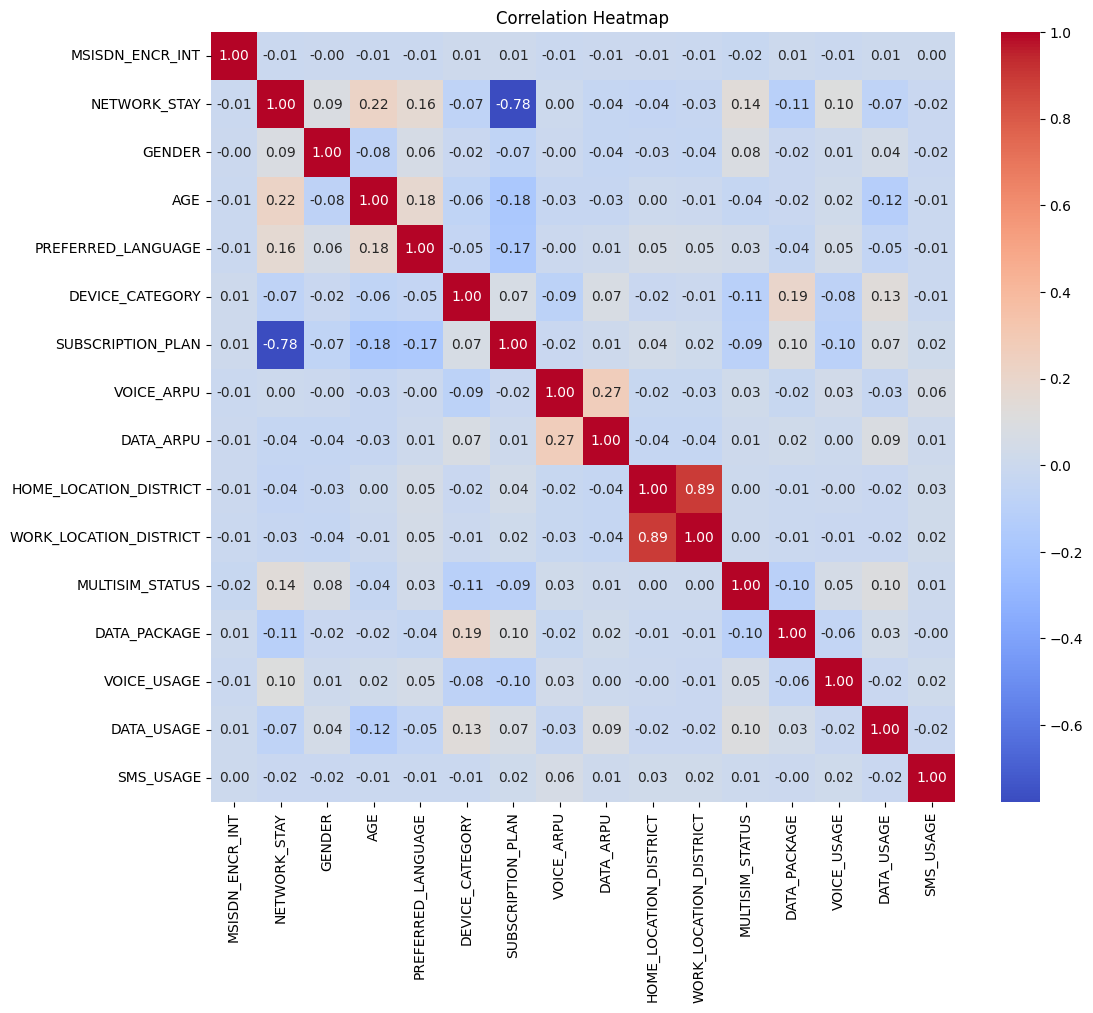

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Data Scaling (Standerd scaler between +3 and -3)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled

array([[-0.12309864,  2.28816949,  0.75889791, ..., -0.4395871 ,
        -0.75486602, -0.07597379],
       [-0.12309864,  2.28816949,  0.75889791, ...,  0.10176295,
        -0.75486602, -0.07597379],
       [-0.12309864,  2.28816949,  0.75889791, ..., -0.28921195,
        -0.75486602, -0.07597379],
       ...,
       [-0.32930463, -0.64617434, -1.27779839, ...,  1.55083115,
        -0.7548632 , -0.07597379],
       [-0.32930463, -0.64617434, -1.27779839, ...,  1.60619649,
        -0.75486602, -0.07597379],
       [-0.32930463, -0.64617434, -1.27779839, ...,  1.92335135,
        -0.7548638 , -0.07597379]])

# Calling DB scan method

In [ ]:
eps = 0.5  # Adjust this value based on your dataset
min_samples = 10  # Adjust this value based on your dataset

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data_scaled)

# Visualizing first five clusters without noice

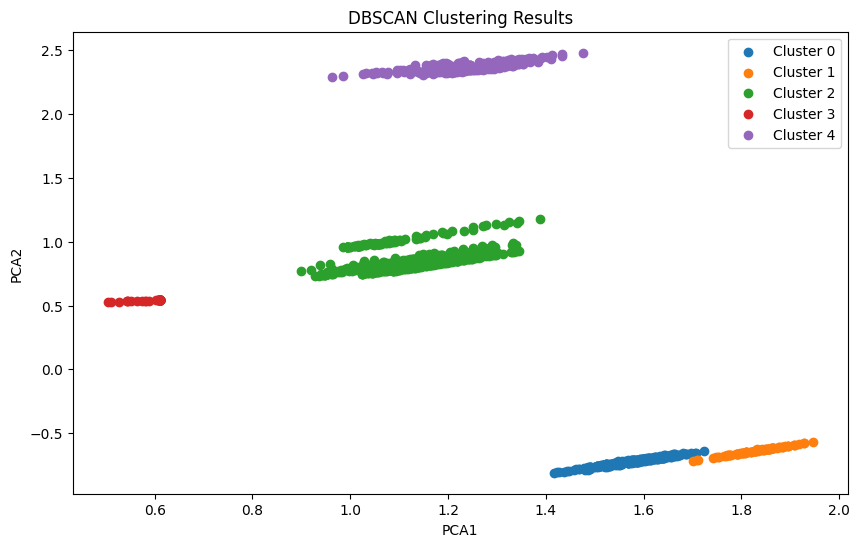

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA components and cluster labels
clustered_data = pd.DataFrame(data={'PCA1': data_pca[:, 0], 'PCA2': data_pca[:, 1], 'Cluster': labels})


clustered_data.to_csv('clustered_data.csv', index=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(0, 5):  # Include noise points (-1) and the five clusters
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

# Save clustered data to a CSV file
clustered_data.to_csv('clustered_data_visual.csv', index=False)


plt.savefig('dbscan_clusters_visual.png')

plt.show()



In [ ]:
print(dbscan.labels_)

[  -1   -1   -1 ... 9137 9137 9137]


In [ ]:
df = pd.DataFrame(labels)
df.to_csv('output.csv')

In [ ]:
df

,0
0,-1
1,-1
2,-1
3,-1
4,0
...,...
1261360,9137
1261361,9137
1261362,9137
1261363,9137


# checkin

In [ ]:
clustered_data

,PCA1,PCA2,Cluster
0,-1.220966,-1.942637,-1
1,-1.306654,-1.953796,-1
2,-1.244768,-1.945737,-1
3,-1.308818,-1.954078,-1
4,1.609307,-0.693284,0
...,...,...,...
1261360,-0.389631,-2.244084,9137
1261361,-0.583295,-2.269304,9137
1261362,-0.684022,-2.282421,9137
1261363,-0.692786,-2.283562,9137


In [ ]:
selected_clusters = range(0, 5)

# Create a dictionary to store DataFrames for each cluster
cluster_data = {}

# Iterate through the selected clusters and extract the associated data
for cluster in selected_clusters:
    cluster_data[cluster] = clustered_data[clustered_data['Cluster'] == cluster].drop(columns=['Cluster'])

# Display the data associated with each cluster in separate DataFrames
for cluster, data in cluster_data.items():
    print(f"Cluster {cluster} data:")
    display(data)

Cluster 0 data:


,PCA1,PCA2
4,1.609307,-0.693284
5,1.531737,-0.740197
6,1.643544,-0.672579
7,1.505153,-0.756275
8,1.543280,-0.733216
...,...,...
351,1.560708,-0.728500
352,1.437267,-0.803155
353,1.631201,-0.685868
354,1.643882,-0.678199


Cluster 1 data:


,PCA1,PCA2
180,1.894559,-0.599398
181,1.816989,-0.646310
182,1.928796,-0.578692
183,1.790404,-0.662388
184,1.828532,-0.639329
...,...,...
263,1.824830,-0.641568
264,1.701388,-0.716223
265,1.895323,-0.598935
266,1.908004,-0.591266


Cluster 2 data:


,PCA1,PCA2
356,1.014861,0.964578
357,1.037109,0.978033
358,1.017472,0.966157
360,1.031542,0.974666
361,1.100140,1.016153
...,...,...
890420,1.035271,0.793511
890421,0.949002,0.741338
890422,0.936476,0.733762
890423,0.952857,0.743669


Cluster 3 data:


,PCA1,PCA2
464,0.611288,0.540930
465,0.607509,0.540442
466,0.611278,0.540924
467,0.611362,0.540975
468,0.611389,0.540991
...,...,...
534,0.611274,0.540922
535,0.611273,0.540921
536,0.611273,0.540921
537,0.611290,0.540931


Cluster 4 data:


,PCA1,PCA2
539,1.229048,2.386275
540,1.224465,2.337346
541,1.341970,2.394291
542,1.258405,2.352840
543,1.289320,2.365684
...,...,...
983,1.286478,2.394418
985,1.118421,2.343815
986,1.300570,2.364957
987,1.356484,2.427155


In [ ]:
# Specify the cluster labels you are interested in (e.g., clusters 0 to 4)
selected_clusters = [0, 1, 2, 3, 4]

# Filter the rows with the selected cluster labels
selected_cluster_data = clustered_data[clustered_data['Cluster'].isin(selected_clusters)]

# Load the original data (assuming you still have access to the original data)


# Merge the selected cluster data with the original data using a common identifier (e.g., an index or a unique identifier column)
merged_data = pd.merge(data, selected_cluster_data, left_index=True, right_index=True)

# Print or explore the merged data to see the original columns associated with the selected clusters
print(merged_data)

       PCA1_x    PCA2_x    PCA1_y    PCA2_y  Cluster
539  1.229048  2.386275  1.229048  2.386275        4
540  1.224465  2.337346  1.224465  2.337346        4
541  1.341970  2.394291  1.341970  2.394291        4
542  1.258405  2.352840  1.258405  2.352840        4
543  1.289320  2.365684  1.289320  2.365684        4
..        ...       ...       ...       ...      ...
983  1.286478  2.394418  1.286478  2.394418        4
985  1.118421  2.343815  1.118421  2.343815        4
986  1.300570  2.364957  1.300570  2.364957        4
987  1.356484  2.427155  1.356484  2.427155        4
988  1.224621  2.347407  1.224621  2.347407        4

[246 rows x 5 columns]


In [ ]:


# Specify the cluster labels you are interested in (e.g., clusters 0 to 4)
selected_clusters = [0, 1, 2, 3, 4]

# Filter the rows with the selected cluster labels
selected_cluster_data = clustered_data[clustered_data['Cluster'].isin(selected_clusters)]



# Merge the selected cluster data with the original data using a common identifier (e.g., index or a unique identifier column)
merged_data = pd.merge(data, selected_cluster_data, left_index=True, right_index=True)

# Create a new DataFrame containing only the original columns associated with the selected clusters
original_columns_data = merged_data.drop(['PCA1', 'PCA2', 'Cluster'], axis=1)

# Now, 'original_columns_data' is a DataFrame with the original columns associated with the selected clusters
print(original_columns_data)

        MSISDN_ENCR_INT  NETWORK_STAY  GENDER  AGE  PREFERRED_LANGUAGE  \
4         -4.362307e+18             0       1   37                   1   
5         -4.362307e+18             0       1   37                   1   
6         -4.362307e+18             0       1   37                   1   
7         -4.362307e+18             0       1   37                   1   
8         -4.362307e+18             0       1   37                   1   
...                 ...           ...     ...  ...                 ...   
506917     4.283694e+17             0       1   19                   1   
506918     4.283694e+17             0       1   19                   1   
506919     4.283694e+17             0       1   19                   1   
506920     4.283694e+17             0       1   19                   1   
506921    -6.066278e+18             0       0   57                   0   

        DEVICE_CATEGORY  SUBSCRIPTION_PLAN  VOICE_ARPU  DATA_ARPU  \
4                     3                  7

In [ ]:
original_columns_data

,MSISDN_ENCR_INT,NETWORK_STAY,GENDER,AGE,PREFERRED_LANGUAGE,DEVICE_CATEGORY,SUBSCRIPTION_PLAN,VOICE_ARPU,DATA_ARPU,HOME_LOCATION_DISTRICT,WORK_LOCATION_DISTRICT,MULTISIM_STATUS,DATA_PACKAGE,VOICE_USAGE,DATA_USAGE,SMS_USAGE
4,-4.362307e+18,0,1,37,1,3,7,3,308,15,17,0,48,0.00000,1921.88583,0
5,-4.362307e+18,0,1,37,1,3,7,3,308,15,17,0,48,0.00000,1420.52754,0
6,-4.362307e+18,0,1,37,1,3,7,3,308,15,17,0,48,0.00000,2143.16979,0
7,-4.362307e+18,0,1,37,1,3,7,3,308,15,17,0,48,0.00000,1248.70190,0
8,-4.362307e+18,0,1,37,1,3,7,3,308,15,17,0,48,0.00000,1495.13236,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506917,4.283694e+17,0,1,19,1,3,7,49,25,13,13,0,54,8.83333,1403.77105,0
506918,4.283694e+17,0,1,19,1,3,7,49,25,13,13,0,54,2.78333,376.08110,0
506919,4.283694e+17,0,1,19,1,3,7,49,25,13,13,0,54,0.20000,2.18039,0
506920,4.283694e+17,0,1,19,1,3,7,49,25,13,13,0,54,0.00000,0.80078,0


In [ ]:
original_columns_data.to_csv('original_columns_data.csv', index=False)